# Installing Tensorflow
We will creat an environment for tensorflow that will activate every time we use th package


### NOTE: it will take some time!

In [1]:
%pip install --upgrade pip
%pip install tensorflow==2.5.0

Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-2.5.0-cp37-cp37m-win_amd64.whl (422.6 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Attempting uninstall: grpcio
    Found existing instal

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 0.6.0 requires torchvision<0.5,>=0.4.0, but you have torchvision 0.5.0 which is incompatible.


#### If you see the message below, restart the kernel please from the panel above (Kernels>restart)! 

    'Note: you may need to restart the kernel to use updated packages.'

#### Let's check if you have everything!

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
reachout='Please repeat the steps above. If it still does not work, reach out to me (as2738@cornell.edu)'
try:
    import tensorflow
    print('tensorflow is all good!')
except:
    rint("An exception occurred in tensorflow installation."+reachout)
try:
    from tensorflow import keras
    print('keras is all good!')
except:
    print("An exception occurred in keras installation."+reachout)

tensorflow is all good!
keras is all good!


### Now let's explore tensorflow!

From its name tensorflow stores constants as tensor objects! Let's create our first constant!

In [3]:
import tensorflow as tf
###
import tensorflow.compat.v1 as tf
tf.enable_eager_execution()
tf.disable_v2_behavior() 
###
myfirstconst = tf.constant('Hello World')
myfirstconst

Instructions for updating:
non-resource variables are not supported in the long term


<tf.Tensor 'Const:0' shape=() dtype=string>

In [4]:
x = tf.constant(130.272)
x

<tf.Tensor 'Const_1:0' shape=() dtype=float32>

### TF Sessions

Let's create a TensorFlow Session. It can be thought of as a class for running TensorFlow operations. The session encapsulates the environment in which operations take place.
Let's do a quick example:

In [5]:
a = tf.constant(1)
b = tf.constant(5)
with tf.Session() as Session:
    print('TF simple Operations')
    print('Multiply',Session.run(a*b))
    print('Divide',Session.run(a/b))
    print('Add',Session.run(a+b))
    print('Subtract',Session.run(b-a))

TF simple Operations
Multiply 5
Divide 0.2
Add 6
Subtract 4


#### Now let's multiply a matrix 

In [6]:
import numpy as np
m = np.array([[1.0,2.0]])
n = np.array([[3.0],[4.0]])
multi = tf.matmul(m,n)
multi

<tf.Tensor 'MatMul:0' shape=(1, 1) dtype=float64>

In [7]:
with tf.Session() as Session:
    res = Session.run(multi)
    print(res)

[[11.]]


### TF Variables

Sometimes you want to define a variable rsulting from operations. **tf.variable is ideal for this case!**


Let's see how to use it!

In [8]:
#We have to start a session!
sess = tf.InteractiveSession()

atensor = tf.random_uniform((2,2),0,1)
atensor

<tf.Tensor 'random_uniform/RandomUniform:0' shape=(2, 2) dtype=float32>

In [9]:
var = tf.Variable(initial_value=atensor)
var

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32_ref>

In [10]:
try:
    with tf.Session() as Session:
        res = Session.run(var)
        print(res)
except:
  print("error!")

error!


In [11]:
initialize = tf.global_variables_initializer()
initialize.run()
var.eval()

array([[0.34369397, 0.72216237],
       [0.6368377 , 0.5872576 ]], dtype=float32)

In [12]:
sess.run(var)

array([[0.34369397, 0.72216237],
       [0.6368377 , 0.5872576 ]], dtype=float32)

## Now let's custom build our first neural networks!

In [13]:
xd = np.linspace(0,10,100) + np.random.uniform(-3,.5,100)
yd = np.linspace(0,10,100) + np.random.uniform(-.5,2,100)

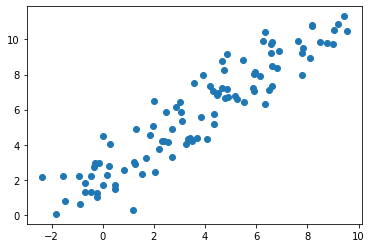

In [14]:
 import matplotlib.pyplot as plt
plt.plot(xd,yd,'o')

### Let's define our variables here

$y=m*x+b$

In [15]:
#Let's intialize with a guess
m = tf.Variable(1.0)
b = tf.Variable(0.1)

In [16]:
#Let's build or objective function!
#initialize error
e=0
for x,y in zip(xd,yd):
    #our model
    y_pred = m*x + b
    # our error
    e += (y-y_pred)**2

## tensorflow optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

## we want to minimize error
training = optimizer.minimize(e)

## initilize our variables with tensorflow
initalize = tf.global_variables_initializer()


#start the session for 1000 epochs!
with tf.Session() as sess:
    
    sess.run(initalize)
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(training)
        

    # Get results
    
    mf, bf = sess.run([m,b])


In [17]:
print("The slope is {} and the intercept is {}".format(mf, bf))

The slope is 1.0860979557037354 and the intercept is 1.3717418909072876


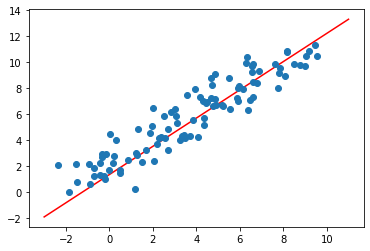

In [18]:
#Let's evalute our results
x_v = np.linspace(-3,11,300)
y_v = mf*x_v + bf
plt.plot(x_v,y_v,'r')
plt.plot(xd,yd,'o')